# Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
%matplotlib notebook

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

In [3]:
#setup date frame and put in city names
city_name=[]
country=[]
date=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiniss=[]
wind_speed=[]

city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness":cloudiniss,
                        "Country": country,
                        "Date":date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp":max_temp,
                        "Wind Speed": wind_speed})
city_df["City"]=cities

city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,caravelas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sao filipe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kapaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ushuaia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
#set base_url of inquire by city name
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#start API calls
print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in city_df.iterrows():
    city=row["City"]

    #using city names and set unit to imperial since we need degree in F
    respond = requests.get(f"{base_url}{city}&units=imperial&APPID={api_key}").json()   
    # if the website find the city, save required information in the cell of each roll
    try:
        print(f"Processing Record {index+1} | City name: {city}")
        city_df.loc[index,"Cloudiness"]=respond["clouds"]["all"]
        city_df.loc[index,"Country"]=respond["sys"]["country"]
        city_df.loc[index,"Date"]=respond["dt"]
        city_df.loc[index,"Humidity"]=respond["main"]["humidity"]
        city_df.loc[index,"Lat"]=respond["coord"]["lat"]
        city_df.loc[index,"Lng"]=respond["coord"]["lon"]
        city_df.loc[index,"Max Temp"]=respond["main"]["temp_max"]
        city_df.loc[index,"Wind Speed"]=respond["wind"]["speed"]
    #if the webiste cannot find the city, print below message and no information will be saved
    except:
        print("City not found. Skipping...")
        



Beginning Data Retrieval
-----------------------------
Processing Record 1 | City name: caravelas
Processing Record 2 | City name: sao filipe
Processing Record 3 | City name: kapaa
Processing Record 4 | City name: ushuaia
Processing Record 5 | City name: victoria
Processing Record 6 | City name: rikitea
Processing Record 7 | City name: lincoln
Processing Record 8 | City name: saint-philippe
Processing Record 9 | City name: hobart
Processing Record 10 | City name: arraial do cabo
Processing Record 11 | City name: samusu
City not found. Skipping...
Processing Record 12 | City name: faya
Processing Record 13 | City name: puerto ayora
Processing Record 14 | City name: havelock
Processing Record 15 | City name: atuona
Processing Record 16 | City name: raga
City not found. Skipping...
Processing Record 17 | City name: zhicheng
Processing Record 18 | City name: east london
Processing Record 19 | City name: nuevo ideal
Processing Record 20 | City name: upernavik
Processing Record 21 | City nam

Processing Record 175 | City name: lesnoy
Processing Record 176 | City name: filadelfia
Processing Record 177 | City name: te anau
Processing Record 178 | City name: padang
Processing Record 179 | City name: geraldton
Processing Record 180 | City name: buala
Processing Record 181 | City name: terrace
Processing Record 182 | City name: margate
Processing Record 183 | City name: talnakh
Processing Record 184 | City name: coquimbo
Processing Record 185 | City name: manicore
Processing Record 186 | City name: mackenzie
Processing Record 187 | City name: saint george
Processing Record 188 | City name: georgetown
Processing Record 189 | City name: chara
Processing Record 190 | City name: maghama
City not found. Skipping...
Processing Record 191 | City name: totskoye
Processing Record 192 | City name: srednekolymsk
Processing Record 193 | City name: narsaq
Processing Record 194 | City name: dharchula
Processing Record 195 | City name: rungata
City not found. Skipping...
Processing Record 196 

Processing Record 349 | City name: huaraz
Processing Record 350 | City name: artyk
City not found. Skipping...
Processing Record 351 | City name: shelopugino
Processing Record 352 | City name: maningrida
Processing Record 353 | City name: atar
Processing Record 354 | City name: camana
City not found. Skipping...
Processing Record 355 | City name: bonthe
Processing Record 356 | City name: luderitz
Processing Record 357 | City name: surt
Processing Record 358 | City name: souillac
Processing Record 359 | City name: carauari
Processing Record 360 | City name: tumannyy
City not found. Skipping...
Processing Record 361 | City name: petrolandia
City not found. Skipping...
Processing Record 362 | City name: rawannawi
City not found. Skipping...
Processing Record 363 | City name: teixeira
Processing Record 364 | City name: soyo
Processing Record 365 | City name: wajima
Processing Record 366 | City name: port elizabeth
Processing Record 367 | City name: hasaki
Processing Record 368 | City name:

Processing Record 525 | City name: tinskoy
Processing Record 526 | City name: atherton
Processing Record 527 | City name: lahaina
Processing Record 528 | City name: eidsvag
Processing Record 529 | City name: ruatoria
City not found. Skipping...
Processing Record 530 | City name: kropotkin
Processing Record 531 | City name: kavaratti
Processing Record 532 | City name: henties bay
Processing Record 533 | City name: kupang
Processing Record 534 | City name: kieta
Processing Record 535 | City name: asayita
City not found. Skipping...
Processing Record 536 | City name: aguimes
Processing Record 537 | City name: easley
Processing Record 538 | City name: forest
Processing Record 539 | City name: kruisfontein
Processing Record 540 | City name: susangerd
Processing Record 541 | City name: moryakovskiy zaton
Processing Record 542 | City name: dryden
Processing Record 543 | City name: namatanai
Processing Record 544 | City name: azar shahr
City not found. Skipping...
Processing Record 545 | City 

# Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#data cleaning, drop those cities that cannot be found
city_df=city_df.dropna(how="any")
city_df.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [6]:
#show dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,caravelas,32.0,BR,1.535966e+09,100.0,-17.73,-39.27,75.01,13.00
1,sao filipe,100.0,CV,1.535966e+09,100.0,14.90,-24.50,78.16,12.55
2,kapaa,90.0,US,1.535964e+09,100.0,22.08,-159.32,75.02,5.82
3,ushuaia,20.0,AR,1.535962e+09,96.0,-54.81,-68.31,37.40,6.93
4,victoria,75.0,BN,1.535963e+09,70.0,5.28,115.24,87.80,9.17


In [8]:
#reset index and save to a csv file
city_df.reset_index()
city_df.to_csv("Result/City_Data.csv")

# Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


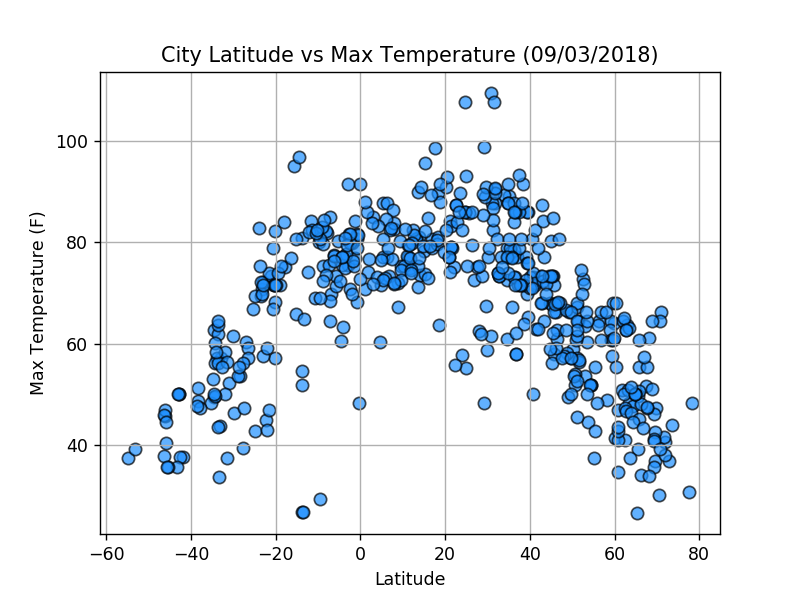

In [43]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_temp=plt.scatter(city_df["Lat"],city_df["Max Temp"],s=50,marker="o", facecolors="dodgerblue", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Max Temperature (09/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Result/Lat_vs_Temp.png")
plt.show()

# Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


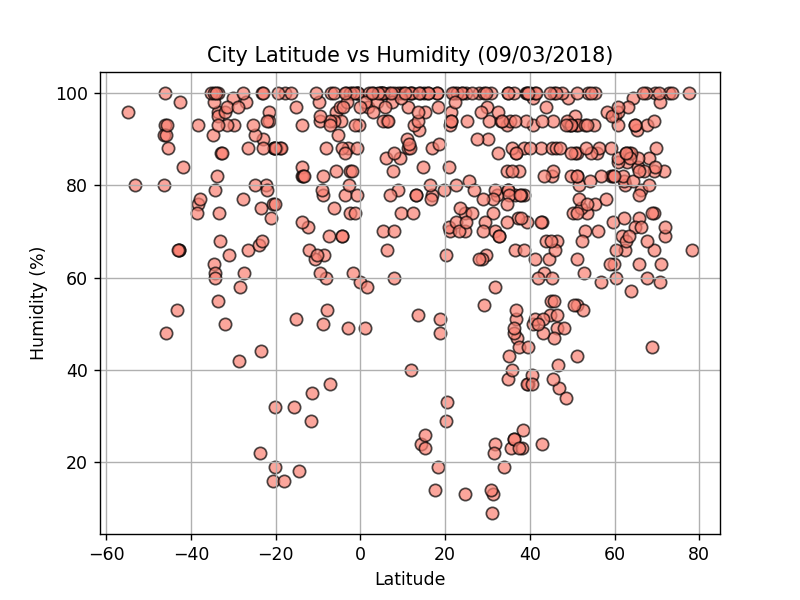

In [44]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_humid= plt.scatter(city_df["Lat"],city_df["Humidity"],s=50,marker="o", facecolors="salmon", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Humidity (09/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("Result/Lat_vs_Humidity.png")

# Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


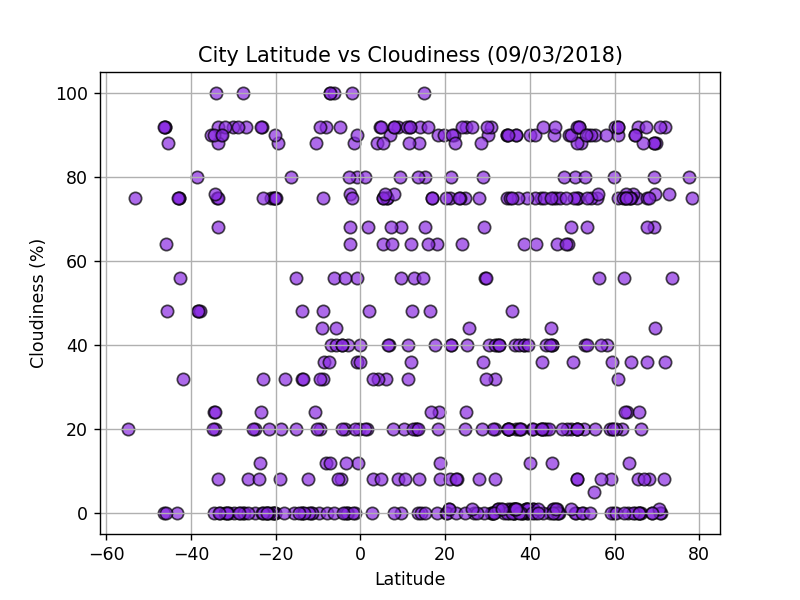

In [45]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_cloud= plt.scatter(city_df["Lat"],city_df["Cloudiness"],s=50,marker="o", facecolors="blueviolet", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Cloudiness (09/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("Result/Lat_vs_Cloudiness.png")

#  Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


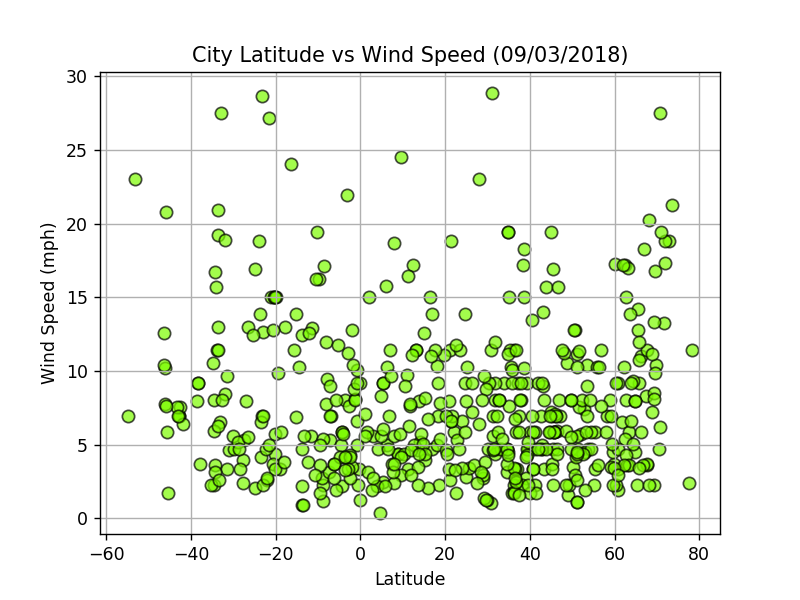

In [46]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_wind= plt.scatter(city_df["Lat"],city_df["Wind Speed"],s=50,marker="o", facecolors="lawngreen", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Wind Speed (09/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("Result/Lat_vs_WindSpeed.png")

# Observable Trends
* The closer the latitude of the city to 0 degree, the higher the tempature is.
* There is no obvious evidence that latitude has an effect on humidity, cloudiness, and wind speed.
* We can see that the top three highest tempature occur at cities located around latitude +30 degree. This because that the date is 09/03. The latitude that receives 90 degree sunshine is still in the north of equator until 9/23.